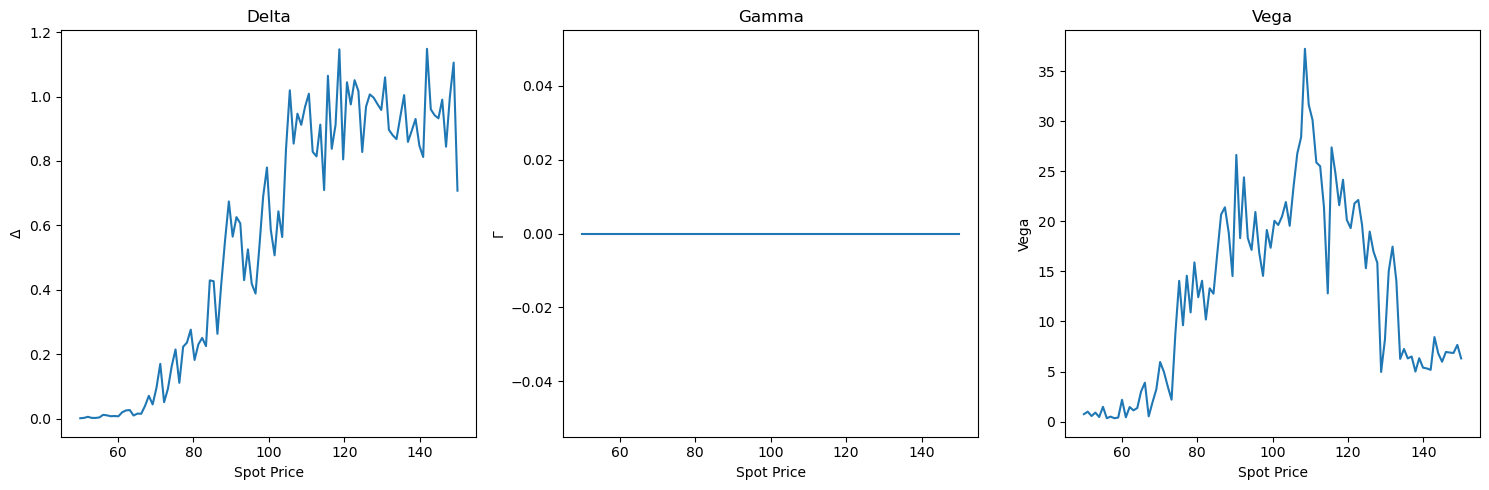

Greeks calculation complete!


In [7]:
# Greeks Calculation Notebook

import sys
sys.path.append('../src')

import torch
import numpy as np
import matplotlib.pyplot as plt
from models.neural_network import OptionPricingNN
from greeks.autograd_greeks import get_delta, get_gamma, get_vega

# Load trained model

model = OptionPricingNN(input_dim=5)
model.load_state_dict(torch.load('../data/models/option_pricing_nn.pth'))
model.eval()

# Calculate Greeks for different spot prices
spot_prices = np.linspace(50, 150, 100)
deltas = []
gammas = []
vegas = []

for S in spot_prices:
    # Create input tensor (S, K, T, r, sigma)
    inputs = torch.tensor([S, 100, 1.0, 0.05, 0.2], dtype=torch.float32).unsqueeze(0)

    # Calculate Greeks
    delta = get_delta(model, inputs)
    gamma = get_gamma(model, inputs)
    vega = get_vega(model, inputs)

    deltas.append(delta.item())
    gammas.append(gamma.item())
    vegas.append(vega.item())

# Plot Greeks
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(spot_prices, deltas)
plt.title('Delta')
plt.xlabel('Spot Price')
plt.ylabel('Δ')

plt.subplot(1, 3, 2)
plt.plot(spot_prices, gammas)
plt.title('Gamma')
plt.xlabel('Spot Price')
plt.ylabel('Γ')

plt.subplot(1, 3, 3)
plt.plot(spot_prices, vegas)
plt.title('Vega')
plt.xlabel('Spot Price')
plt.ylabel('Vega')

plt.tight_layout()
plt.savefig('../results/greeks_plot.png')
plt.show()

print("Greeks calculation complete!")